# Benin Solar Dataset - Exploratory Data Analysis (EDA)

## Objective
Profile, clean, and explore Benin's solar dataset end-to-end so it’s ready for comparison and region-ranking tasks.

This notebook covers:
- Summary statistics and missing value report
- Outlier detection and cleaning
- Time series analysis
- Cleaning impact analysis
- Correlation and relationship analysis
- Wind & distribution analysis
- Temperature analysis
- Bubble chart visualization

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("benin-malanville.csv")  # File name must be in quotes

# Show basic info and first rows
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Summary Statistics & Missing-Value Report

- Display summary statistics for numeric columns.
- Show count of missing values per column.
- List columns with more than 5% missing values.


In [2]:
# Summary statistics for numeric columns
print(df.describe())

# Missing values count per column
missing_counts = df.isna().sum()
print(missing_counts)

# Percentage of missing values per column
missing_percent = (missing_counts / len(df)) * 100
print(missing_percent)

# Columns with > 5% missing values
cols_above_5pct_null = missing_percent[missing_percent > 5].index.tolist()
print("Columns with >5% missing values:", cols_above_5pct_null)


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.342811     167.187516     110.899160     236.524528   
std       330.868308     261.710501     152.922463     326.815176   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       0.500000       4.500000   
75%       482.900000     314.200000     210.500000     463.600000   
max      1233.000000     952.300000     591.400000    1215.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.737160      28.179683      54.487969       2.082432   
std       316.357415       5.924297      28.073069       1.521898   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

"""
## Outlier Detection & Basic Cleaning
- Check sensor columns for outliers using Z-score
- Handle missing values
- Export cleaned dataset
"""

In [3]:
# Code Cell: Outlier detection
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df[columns_to_check].apply(zscore)
outliers = (np.abs(df_z) > 3)
print("Outlier counts per column:", outliers.sum())

Outlier counts per column: GHI          1
DNI          0
DHI       1932
ModA         0
ModB         0
WS        1133
WSgust     828
dtype: int64


In [4]:
# Replace outliers with NaN then impute with median
df_clean = df.copy()
df_clean[columns_to_check] = df_clean[columns_to_check].mask(outliers)
df_clean[columns_to_check] = df_clean[columns_to_check].fillna(df_clean[columns_to_check].median())


In [5]:
# Export cleaned data
import os

# Create the 'data' folder if it doesn't exist
os.makedirs("data", exist_ok=True)

# Export cleaned data
df_clean.to_csv("data/benin_clean.csv", index=False)



In [6]:
# Load cleaned data
df = pd.read_csv('data/benin_clean.csv')

# Convert Timestamp column to datetime if not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index for time series analysis
df.set_index('Timestamp', inplace=True)

<Figure size 1600x800 with 0 Axes>

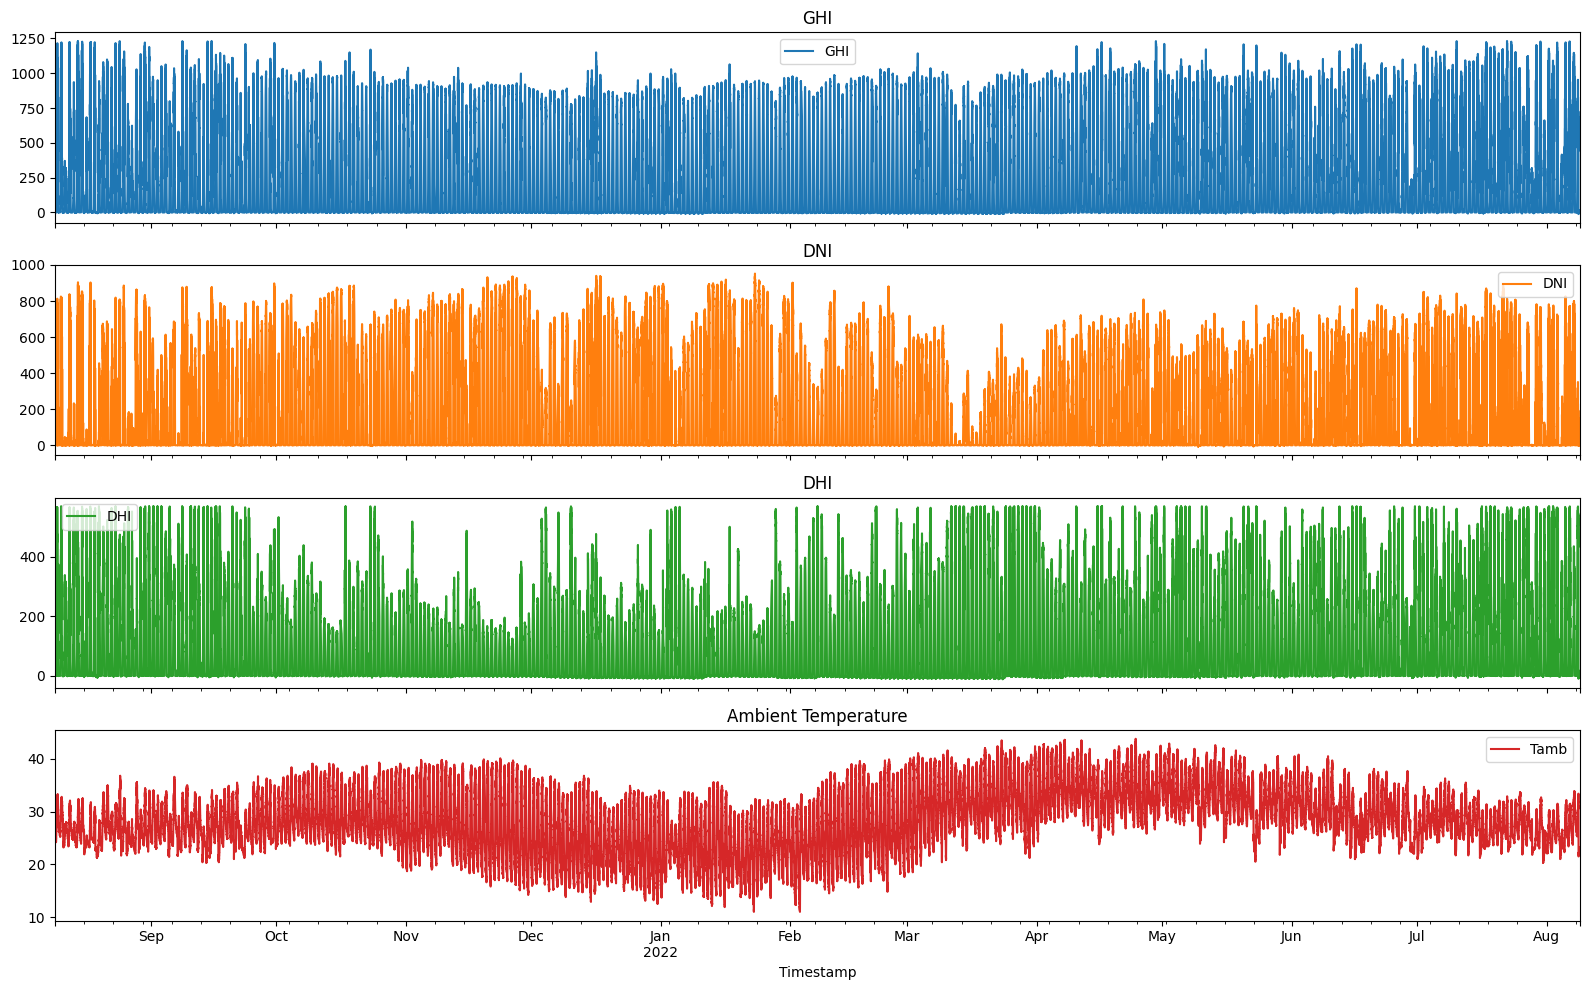

In [7]:
# Plot GHI, DNI, DHI, Tamb over time
plt.figure(figsize=(16, 8))
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(16, 10), title=["GHI", "DNI", "DHI", "Ambient Temperature"])
plt.tight_layout()
plt.show()


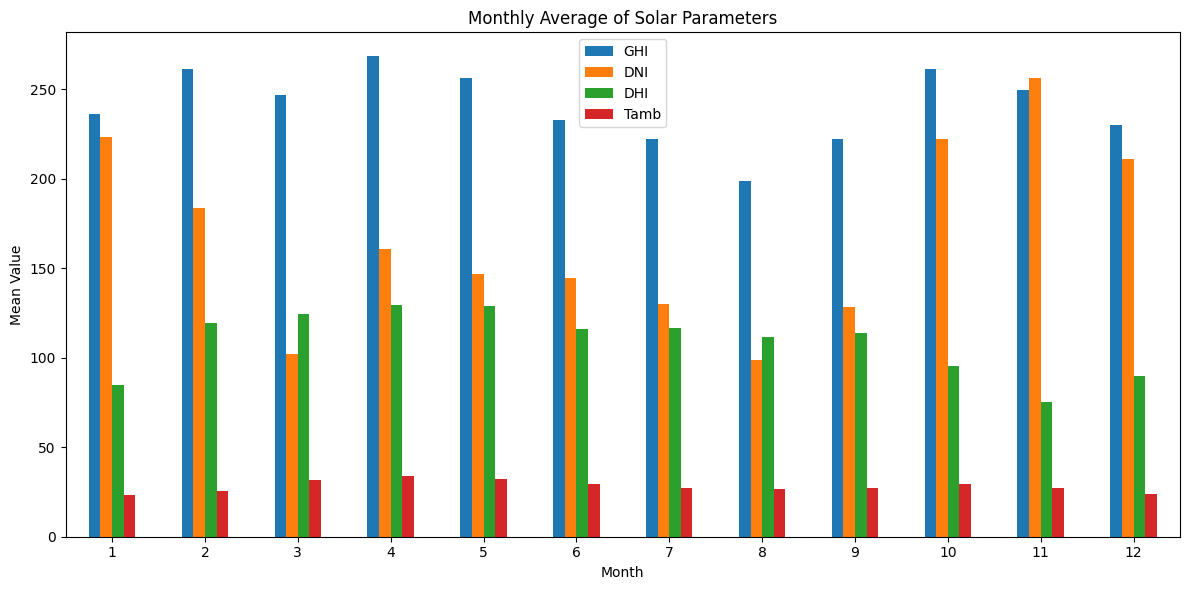

In [8]:
df['Month'] = df.index.month

# Average values per month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
monthly_avg.plot(kind='bar', figsize=(12, 6), title="Monthly Average of Solar Parameters")
plt.xlabel("Month")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


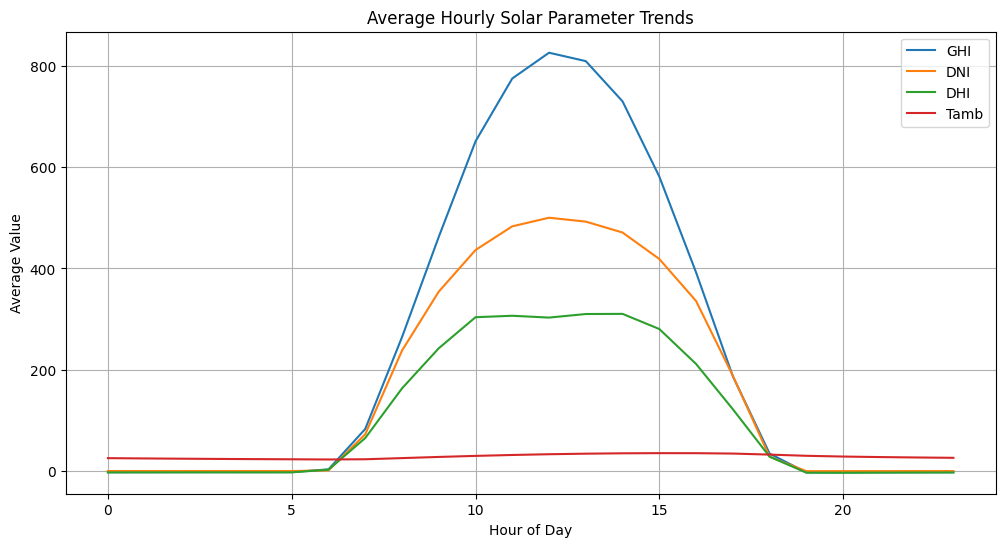

In [9]:
df['Hour'] = df.index.hour

# Average hourly pattern
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
hourly_avg.plot(figsize=(12, 6), title="Average Hourly Solar Parameter Trends")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()


In [10]:
from scipy.stats import zscore

# Compute z-scores
z_scores = df[['GHI', 'DNI', 'DHI', 'Tamb']].apply(zscore)

# Mark anomalies where z-score > 3 or < -3
anomalies = (z_scores.abs() > 3)

# Count anomalies per parameter
anomalies.sum()


GHI        0
DNI        0
DHI     1030
Tamb       0
dtype: int64

In [11]:
print(df_clean.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


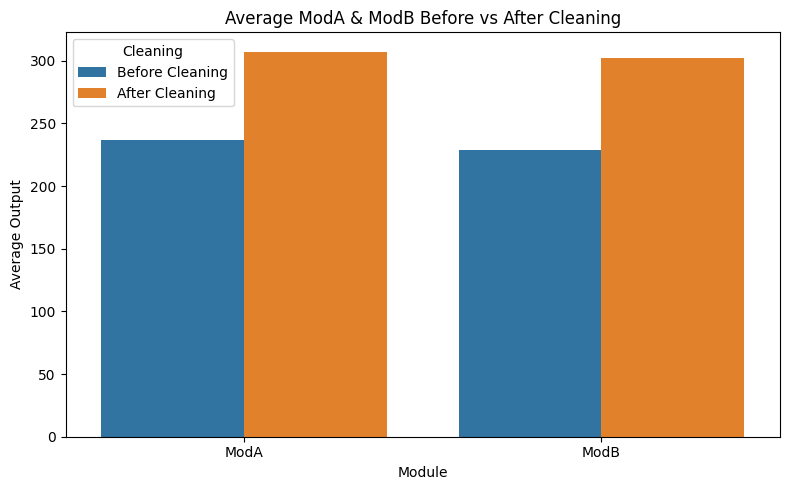

In [12]:
# Group by the cleaning flag
grouped = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# (Optional) Rename for readability
grouped['Cleaning'] = grouped['Cleaning'].map({0: 'Before Cleaning', 1: 'After Cleaning'})

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped.melt(id_vars='Cleaning', value_vars=['ModA', 'ModB']),
            x='variable', y='value', hue='Cleaning')
plt.title('Average ModA & ModB Before vs After Cleaning')
plt.xlabel('Module')
plt.ylabel('Average Output')
plt.tight_layout()
plt.show()


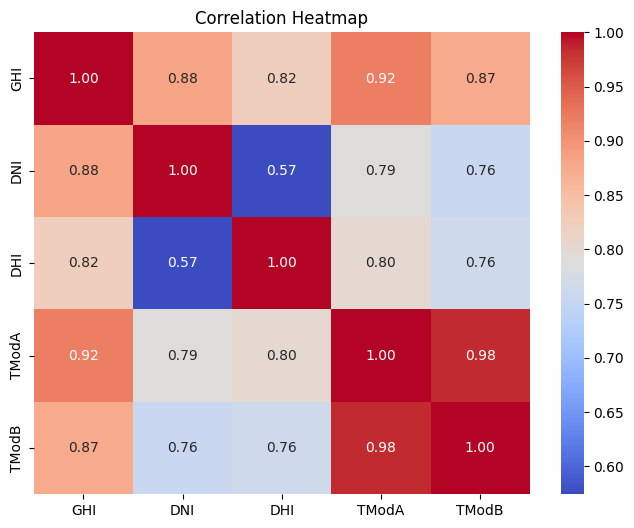

In [13]:
# Heatmap of correlations
# Checking how strongly GHI, DNI, DHI, TModA, and TModB are related.
# Select relevant columns
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[correlation_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

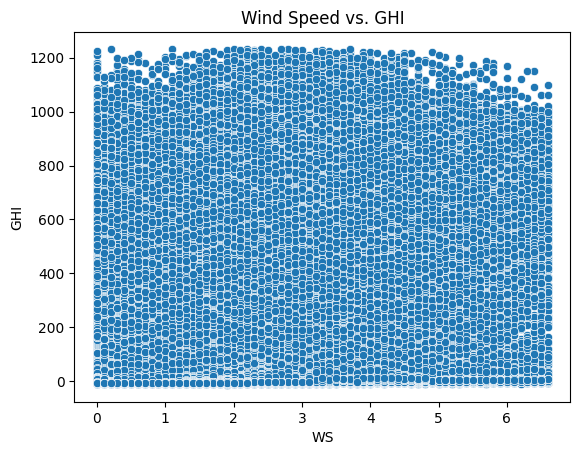

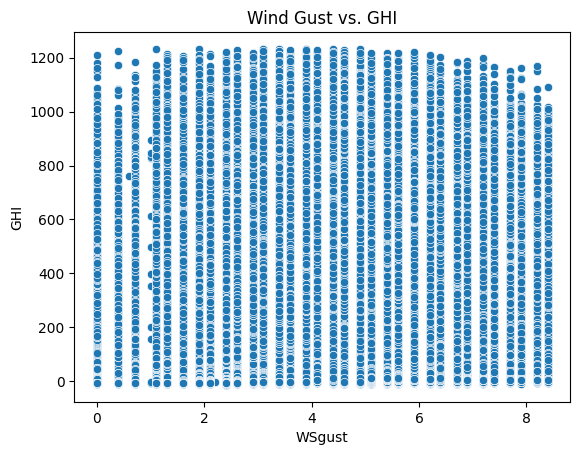

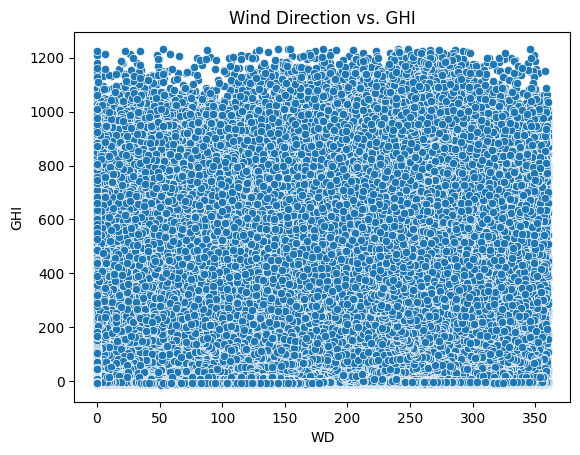

In [14]:

# Wind Speed vs. GHI
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title('Wind Speed vs. GHI')
plt.show()

# Wind Gust vs. GHI
sns.scatterplot(data=df_clean, x='WSgust', y='GHI')
plt.title('Wind Gust vs. GHI')
plt.show()

# Wind Direction vs. GHI
sns.scatterplot(data=df_clean, x='WD', y='GHI')
plt.title('Wind Direction vs. GHI')
plt.show()


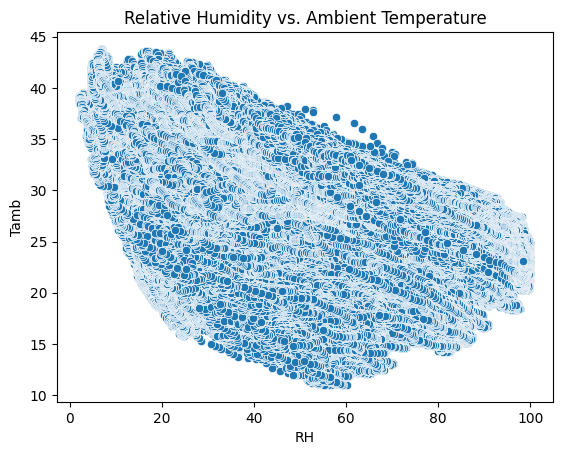

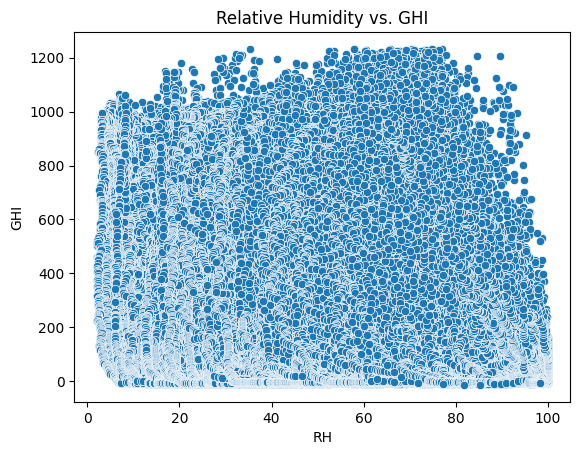

In [15]:
# RH vs. Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title('Relative Humidity vs. Ambient Temperature')
plt.show()

# RH vs. GHI
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title('Relative Humidity vs. GHI')
plt.show()


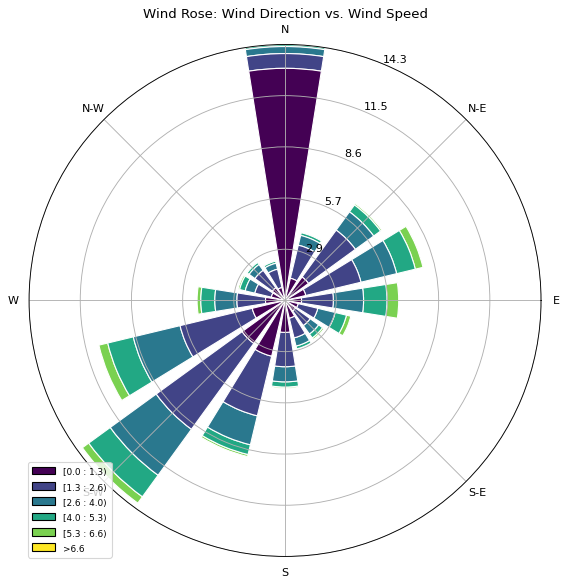

In [16]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Drop rows with missing wind speed/direction
wind_data = df_clean[['WS', 'WD']].dropna()

# Plot wind rose
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose: Wind Direction vs. Wind Speed")
plt.show()


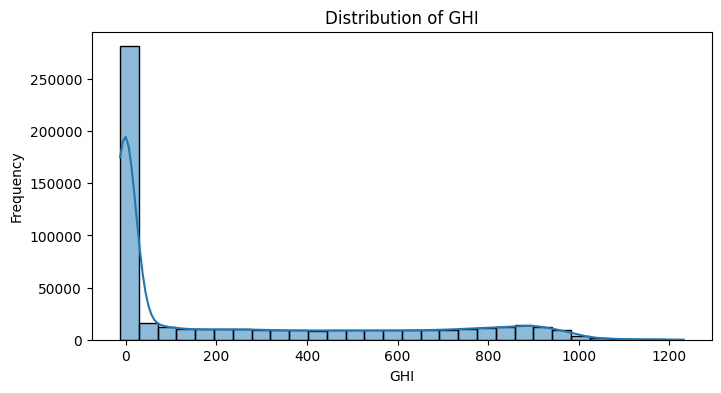

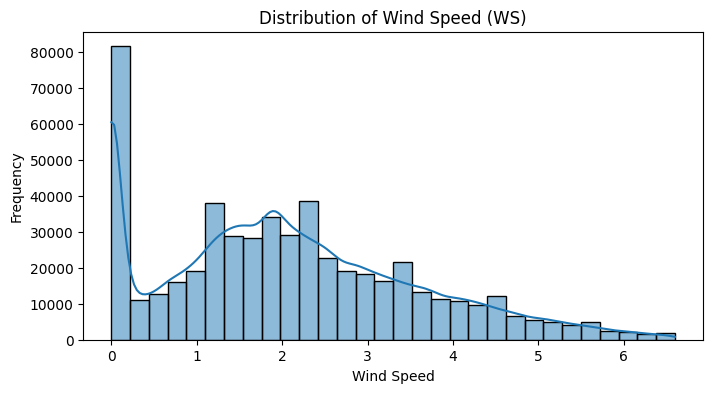

In [17]:
import seaborn as sns

# Histogram for GHI
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['GHI'].dropna(), bins=30, kde=True)
plt.title('Distribution of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

# Histogram for WS
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['WS'].dropna(), bins=30, kde=True)
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()


In [18]:
print(df_clean.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


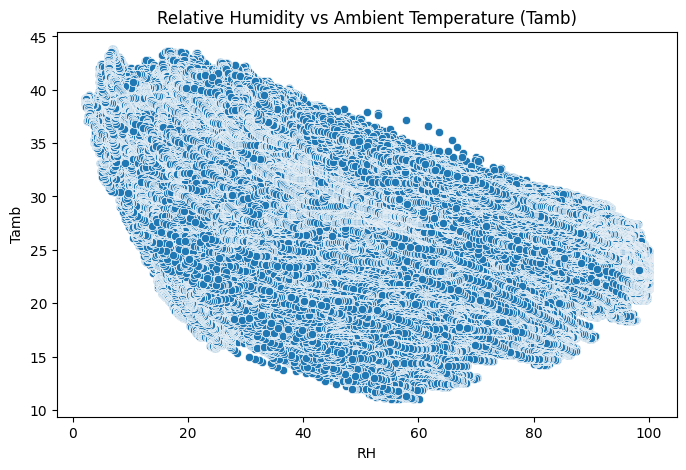

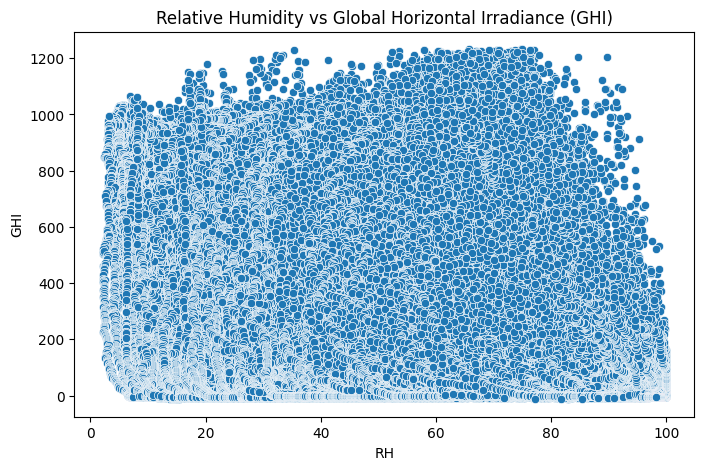

In [19]:
# Scatter plot RH vs. Tamb (ambient temperature)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title('Relative Humidity vs Ambient Temperature (Tamb)')
plt.show()

# Scatter plot RH vs. GHI (Global Horizontal Irradiance)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.show()

In [20]:
# Calculate and print correlation coefficients
print("Correlation between RH and Tamb:", df_clean['RH'].corr(df_clean['Tamb']))
print("Correlation between RH and GHI:", df_clean['RH'].corr(df_clean['GHI']))


Correlation between RH and Tamb: -0.41484177497995545
Correlation between RH and GHI: -0.36062884090735703


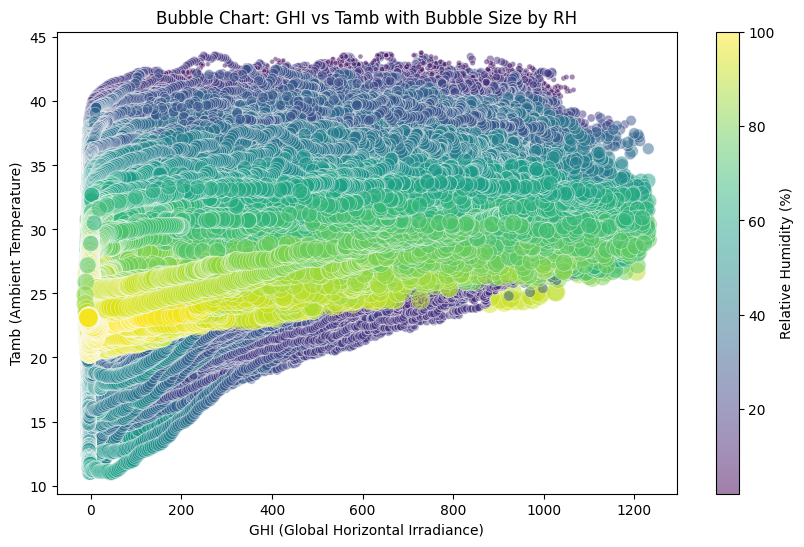

In [21]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_clean['GHI'], df_clean['Tamb'], 
                      s=df_clean['RH']*2,  # multiply to scale bubble size
                      alpha=0.5, 
                      c=df_clean['RH'],    # color bubbles by RH as well
                      cmap='viridis',
                      edgecolors='w',
                      linewidth=0.5)

plt.colorbar(scatter, label='Relative Humidity (%)')
plt.xlabel('GHI (Global Horizontal Irradiance)')
plt.ylabel('Tamb (Ambient Temperature)')
plt.title('Bubble Chart: GHI vs Tamb with Bubble Size by RH')
plt.show()


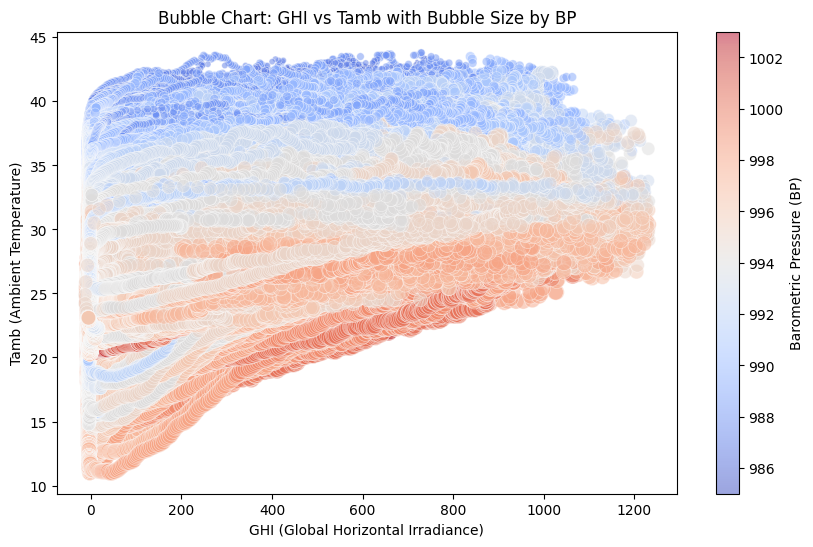

In [22]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_clean['GHI'], df_clean['Tamb'], 
                      s=(df_clean['BP']-df_clean['BP'].min())*10,  # scale BP for size
                      alpha=0.5, 
                      c=df_clean['BP'],
                      cmap='coolwarm',
                      edgecolors='w',
                      linewidth=0.5)

plt.colorbar(scatter, label='Barometric Pressure (BP)')
plt.xlabel('GHI (Global Horizontal Irradiance)')
plt.ylabel('Tamb (Ambient Temperature)')
plt.title('Bubble Chart: GHI vs Tamb with Bubble Size by BP')
plt.show()
